In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler

# Part 1: Prepare the Data

In [3]:
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
df.shape

(618, 15)

In [7]:
df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [68]:
X.shape

(618, 14)

In [34]:
X=df.drop('MYOPIC',axis=1)
labels = df['MYOPIC']

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)


# Part 2: Apply Dimensionality Reduction

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [67]:
myopia_pca.shape

(618, 10)

In [72]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=300, perplexity=50)
tsne_features = tsne.fit_transform(myopia_pca)

/Users/nitchon/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [73]:
tsne_features.shape

(618, 2)

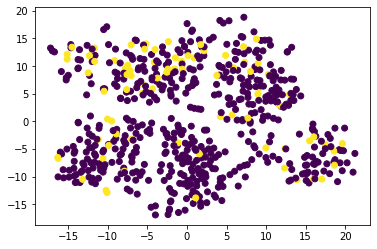

In [74]:
plt.scatter(tsne_features[:,0], tsne_features[:,1],c=labels)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

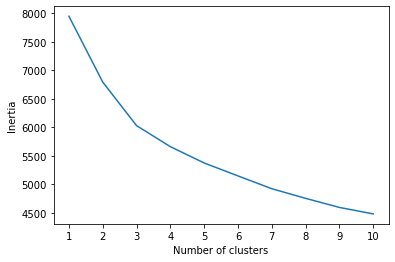

In [45]:
from sklearn.cluster import KMeans
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [53]:
pca_df=pd.DataFrame(myopia_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [46]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [69]:
clusters = get_clusters(3, pca_df)

/Users/nitchon/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/nitchon/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [77]:
def show_clusters(pca_df):
    plt.scatter(pca_df[0], pca_df[1], 
                c=pca_df['class'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

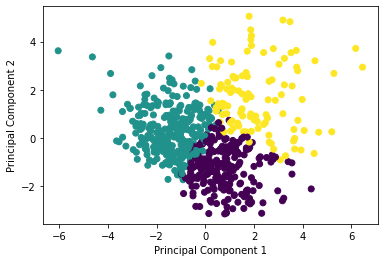

In [78]:
show_clusters(clusters)

# Part 4: Make a Recommendation

After performing dimensionality reduction with PCA, the number of features reduced from 14 to 10. Running t-SNE on the output of PCA, the number of features reduced down to 2. But upon visualizing the t-SNE output, there are no distinct clusters. Using K-means for cluster analysis, the elbow curve points to possibly 3 clusterings of patients. Considering the size of the dataset, I would recommend exploring other cluster models, such as hierarchical clustering which works well with smaller datasets. Another recommendation is collecting more samples to the train the models.